# Detection Malicious URL Using ML Models¶
---

## The Libraries 

In [1]:
pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Standard Library
import re  # Provides support for regular expressions
from urllib.parse import urlparse  # Provides functions to parse URLs

# External Libraries
import numpy as np  # Fundamental package for numerical computations in Python
import pandas as pd  # Data manipulation and analysis library
import seaborn as sns  # Statistical data visualization library based on matplotlib
import matplotlib.pyplot as plt  # Comprehensive library for creating static, animated, and interactive visualizations
from wordcloud import WordCloud  # Library to generate word clouds

# External Libraries - Terminal Colors
from colorama import Fore  # Provides cross-platform colored terminal text

# External Libraries - Machine Learning
from sklearn.model_selection import train_test_split  # Utility for splitting datasets into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Performance metrics for classification tasks
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier  # Ensemble classifiers
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors classifier
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent classifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier

# External Libraries - Top-level Domain (TLD)
from tld import get_tld, is_tld  # Functions for getting and verifying top-level domains

---
## Importing the data

In [3]:
data = pd.read_csv('../input/malicious-urls-dataset/malicious_phish.csv')
data.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

---
## Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


---
## Checking for NaN

- ### Checking the Null Values

In [5]:
data.isnull().sum()

url     0
type    0
dtype: int64

- ### Checking the **counts**

In [6]:
count = data.type.value_counts()
count

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

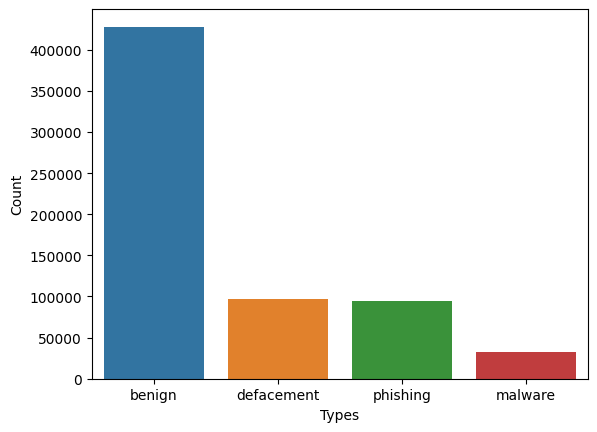

In [7]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

### *leaving the "www." might cause some issues because it is a constant thing between all the urls and it dosen't add any progression to the analysis process*

In [8]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://garage-pirenne.be/index.php?option=com_...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188             gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190              angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]

### *The following code is for mapping the string categories with numerical values, it facilitates further analysis or machine learning tasks.*

In [9]:
#This for removing the warning of the replace function, in the future i would like to use another mapping method
pd.set_option('future.no_silent_downcasting', True)
#----------

rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

---
## Feature Extraction